In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 데이터 정제
- 결측치에 대한 처리
- 이상치에 대한 처리
- 극단치에 대한 처리
- 어떠한 조건을 만족하는 데이터에 대한 처리

### 처리방법
- 제거: 문제가 있다고 판단되는 행이나 열을 제거한다. 데이터가 왜곡되진 않지만 양이 줄어든다.
- 대체: 문제가 있다고 판단되는 값을 다른 값으로 변경한다. 데이터의 양은 유지되지만 왜곡된 데이터가 존재하게 된다.

In [2]:
df1 = pd.read_csv('data/grade.csv', encoding='euc-kr')
df1.set_index('이름', inplace=True)
df1

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


### 결측치 처리

In [3]:
# 결측치 확인 1
# 데이터프레임의 요약정보를 통해 확인함
# Non-null Count: 결측치를 제외한 데이터의 개수
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 철수 to 호영
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학년      5 non-null      int64  
 1   성별      5 non-null      object 
 2   국어      5 non-null      int64  
 3   영어      4 non-null      float64
 4   수학      3 non-null      float64
 5   과학      4 non-null      float64
dtypes: float64(3), int64(2), object(1)
memory usage: 280.0+ bytes


In [7]:
# 결측치 확인 2
# 통계함수를 이용
# 파이썬에서 모든 통계함수는 결측치를 제외하고 계산함
# 따라서 count 함수를 사용하면 결측치를 제외한 데이터 개수를 구할 수 있음
# 전체 행의 개수를 파악함
a1,_ = df1.shape

# 결측치를 제외한 각 행별 개수를 구함
a2 = df1.count()

# 전체 행의 개수에서 결측치를 제외한 각 행별 개수를 구함
a3 = a1 - a2
a3

학년    0
성별    0
국어    0
영어    1
수학    2
과학    1
dtype: int64

In [9]:
# 결측치 확인 3
# isna: 결측치 부분은 True, 결측치가 아닌 부분은 Fasle로 되어 있는 데이터프레임을 반환
# sum: 각 컬럼의 총합을 구함. True나 False로 되어 있을 경우
# True를 1, False를 0으로 취급하여 총합을 구함
df1.isna().sum()

학년    0
성별    0
국어    0
영어    1
수학    2
과학    1
dtype: int64

In [11]:
# 결측치가 포함된 모든 행을 제거함
df2 = df1.copy()

display(df2)

df2.dropna(inplace=True)

display(df2)

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


,학년,성별,국어,영어,수학,과학
이름,,,,,,
영희,2,여자,88,90.0,62.0,72.0
수현,3,여자,63,60.0,31.0,70.0


In [13]:
# 결측치 존재 여부를 확인할 컬럼을 지정
# 지정하지 않은 컬럼은 결측치 존재 여부를 확인하지 않음
df2 = df1.copy()

display(df2)

df2.dropna(subset=['수학', '과학'], inplace=True)

display(df2)

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
수현,3,여자,63,60.0,31.0,70.0


In [16]:
# 모든 컬럼이 결측치로 되어 있는 행을 제거함
df2 = df1.copy()

df2.loc['길동'] = [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]

display(df2)

df2.dropna(how='all', inplace=True)

display(df2)

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1.0,남자,98.0,NaN,88.0,64.0
영희,2.0,여자,88.0,90.0,62.0,72.0
민수,1.0,남자,92.0,70.0,NaN,NaN
수현,3.0,여자,63.0,60.0,31.0,70.0
호영,4.0,남자,120.0,50.0,NaN,88.0
길동,NaN,NaN,NaN,NaN,NaN,NaN


,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1.0,남자,98.0,NaN,88.0,64.0
영희,2.0,여자,88.0,90.0,62.0,72.0
민수,1.0,남자,92.0,70.0,NaN,NaN
수현,3.0,여자,63.0,60.0,31.0,70.0
호영,4.0,남자,120.0,50.0,NaN,88.0


In [17]:
# 결측치를 가지고 있는 모든 컬럼을 제거함
df2 = df1.copy()

display(df2)

df2.dropna(axis=1, inplace=True)

display(df2)

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


,학년,성별,국어
이름,,,
철수,1,남자,98
영희,2,여자,88
민수,1,남자,92
수현,3,여자,63
호영,4,남자,120


In [18]:
# 일부 행을 지정하여 그 행에 결측치가 있는 컬럼을 제거함
df2 = df1.copy()

display(df2)

df2.dropna(axis=1, inplace=True, subset=['철수','영희'])

display(df2)

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


,학년,성별,국어,수학,과학
이름,,,,,
철수,1,남자,98,88.0,64.0
영희,2,여자,88,62.0,72.0
민수,1,남자,92,NaN,NaN
수현,3,여자,63,31.0,70.0
호영,4,남자,120,NaN,88.0


In [20]:
# 모든 행이 결측치로 되어 있는 컬럼을 제거함
df2 = df1.copy()

df2['한국사'] = [np.nan, np.nan, np.nan, np.nan, np.nan]

display(df2)

df2.dropna(axis=1, inplace=True, how='all')

display(df2)

,학년,성별,국어,영어,수학,과학,한국사
이름,,,,,,,
철수,1,남자,98,NaN,88.0,64.0,NaN
영희,2,여자,88,90.0,62.0,72.0,NaN
민수,1,남자,92,70.0,NaN,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0,NaN
호영,4,남자,120,50.0,NaN,88.0,NaN


,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


In [22]:
# 데이터프레임의 모든 결측치를 지정한 값으로 설정함
df2 = df1.copy()

display(df2)

df2.fillna(value=50, inplace=True)

display(df2)

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,50.0,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,50.0,50.0
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,50.0,88.0


In [24]:
# 컬럼별로 결측치를 대치
df2 = df1.copy()

display(df2)

# Series를 추출해 결측치를 채워주면(inplace=True를 넣었다면)
# 원본 데이터프레임에 반영을 해줌
df2['영어'].fillna(value=50, inplace=True)
df2['수학'].fillna(value=50, inplace=True)
df2['과학'].fillna(value=50, inplace=True)

display(df2)

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,50.0,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,50.0,50.0
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,50.0,88.0


In [26]:
# 행별로 결측치를 채워줌
df2 = df1.copy()

display(df2)

# 아래의 경우에는 원본 데이터프레임에 반영이 되지 않음
# df2.loc['철수'].fillna(value=50, inplace=True)
# df2.loc['민수'].fillna(value=60, inplace=True)
# df2.loc['호영'].fillna(value=70, inplace=True)

df2.loc['철수'] = df2.loc['철수'].fillna(value=50)
df2.loc['민수'] = df2.loc['민수'].fillna(value=60)
df2.loc['호영'] = df2.loc['호영'].fillna(value=70)

display(df2)

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,50.0,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,60.0,60.0
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,70.0,88.0


### 이상치
- 이상한 데이터
- 사회 통념상 상식적이지 않은 값들
- 데이터 명세서에 나와 있는 값 혹은 범위에 위배되는 값들
- 극단치는 이상치일 가능성이 있음
- 극단치: IQR을 통해 계산한 상한과 하단을 벗어난 값들
- IQR: 25%~75% 구간

In [27]:
# 카테고리형 데이터는 어떠한 값들이 저장되어 있는지 확인
a1 = df1['학년'].value_counts().index
a2 = df1['성별'].value_counts().index

display(a1)
display(a2)

Int64Index([1, 2, 3, 4], dtype='int64')

Index(['남자', '여자'], dtype='object')

In [28]:
# 범위형 데이터의 이상치 확인, 최소와 최대를 구해 범위를 확인
a1 = df1[['국어', '영어', '수학', '과학']].agg(['min', 'max'])
a1

,국어,영어,수학,과학
min,63,50.0,31.0,64.0
max,120,90.0,88.0,88.0


In [30]:
# 요약통계 정보를 사용
a1 = df1[['국어', '영어', '수학', '과학']].describe()
a1.loc[['min', 'max']]

,국어,영어,수학,과학
min,63.0,50.0,31.0,64.0
max,120.0,90.0,88.0,88.0


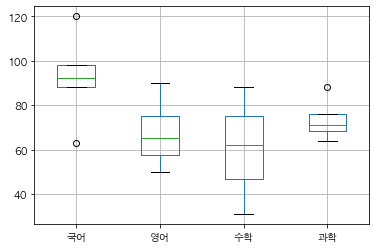

In [32]:
# 데이터프레임을 이용한 boxplot
plt.rcParams['font.family'] = 'AppleGothic'
df1[['국어', '영어', '수학', '과학']].boxplot()
plt.show()

![boxplot](image/1.png)

In [41]:
# 명세서에 위배되는 데이터를 제거
# 국어 점수는 0~100까지로 가정
# 국어점수가 0보다 작거나 100보다 큰 행들의 index를 가져옴
df2 = df1.copy()

idx = df1.query('국어 < 0 or 국어 > 100').index

# 제거함
display(df2)

df2.drop(idx, inplace=True)

display(df2)

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0


In [42]:
# 다른 값으로 대체
df2 = df1.copy()

display(df2)

df2.loc[idx, '국어'] = 100

display(df2)

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,100,50.0,NaN,88.0


In [46]:
# 극단치의 상항과 하한을 구해 처리함
df2 = df1.copy()

# 25%, 75% 위치값을 구함
quantile25 = df2['국어'].quantile(0.25)
quantile75 = df2['국어'].quantile(0.75)

# 75% 위치에서 25% 위치값을 뺀다
IQR_value = quantile75 - quantile25

# 극단치 상한을 구한다
line_up = quantile75 + IQR_value * 1.5
# 근단치 하한을 구한다
line_down = quantile25 - IQR_value * 1.5

print(line_up, line_down)

# 극단치를 제거함
idx = df2.query('국어 < @line_down or 국어 > @line_up').index
df2.drop(idx, inplace=True)

display(df2)

113.0 73.0


,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN


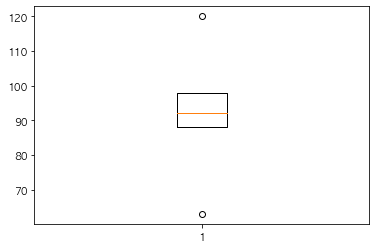

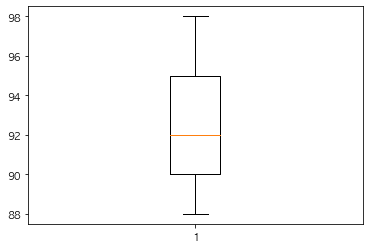

In [48]:
plt.boxplot(df1['국어'])
plt.show()

plt.boxplot(df2['국어'])
plt.show()